In [82]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [83]:
# Set working directory
os.chdir('/Users/alyssaaugsburger/Documents/Berkeley_MIDS/W207/Final_Project')

In [84]:
# Load first npz file as an example and get files
data_1 = np.load('et_w207_project_npz_files_5000_tmp_tmp5ocrhjnn.npz')
data_1.close
data_1.files

['arr_0', 'arr_1']

In [85]:
# Show file arr_0 example
data_1['arr_0'][:5]

array(['ozbpir-9ey6js-ggdqwo', '378ykanq', 'p366md-big834-7o23k6',
       '3zruwvl2', 'q18iae-3vnh74-79npmy'], dtype='<U20')

In [86]:
# Show file arr_1 example
data_1['arr_1'][:5]

array([[-103.939   , -116.779   , -123.68    , ..., -103.939   ,
        -116.779   , -123.68    ],
       [ -46.939003,  -74.779   , -118.68    , ...,  -57.939003,
         -84.779   , -118.68    ],
       [ 151.061   ,  138.22101 ,  131.32    , ...,  151.061   ,
         138.22101 ,  131.32    ],
       [  -3.939003,  -66.779   ,  -96.68    , ...,   -3.939003,
         -66.779   ,  -96.68    ],
       [-103.939   , -116.779   , -123.68    , ..., -103.939   ,
        -116.779   , -123.68    ]], dtype=float32)

In [87]:
# Load all data files
data_2 = np.load('et_w207_project_npz_files_5000_tmp_tmp092sag67.npz')
data_2.close
print(data_2.files)

data_3 = np.load('et_w207_project_npz_files_5000_tmp_tmpf31_pn8p.npz')
data_3.close
print(data_3.files)

data_4 = np.load('et_w207_project_npz_files_5000_tmp_tmpq5b2g4n2.npz')
data_4.close
print(data_4.files)

['arr_0', 'arr_1']
['arr_0', 'arr_1']
['arr_0', 'arr_1']


In [88]:
# Get size of each file
print(data_1['arr_0'].shape)
print(data_1['arr_1'].shape)

(878,)
(878, 150528)


In [89]:
print(data_2['arr_0'].shape)
print(data_2['arr_1'].shape)

(893,)
(893, 150528)


In [90]:
print(data_3['arr_0'].shape)
print(data_3['arr_1'].shape)

(638,)
(638, 150528)


In [91]:
print(data_4['arr_0'].shape)
print(data_4['arr_1'].shape)

(1353,)
(1353, 150528)


In [92]:
# Concatenate image vectors from all files
data_arr0_all = np.concatenate((data_1['arr_0'], data_2['arr_0'], data_3['arr_0'], data_4['arr_0']))
data_arr0_all.shape

(3762,)

In [93]:
data_arr1_all = np.concatenate((data_1['arr_1'], data_2['arr_1'], data_3['arr_1'], data_4['arr_1']))
data_arr1_all.shape

(3762, 150528)

In [94]:
# Store pixel vectors as DF with attachment key

# Create key value pairs with arr0 (attachment key) and standardized arr1 (pixel array)
# Standardize pixel values between 0 and 1 by dividing by 255
data_dict = {}
for i in range(data_arr0_all.shape[0]):
    data_dict[data_arr0_all[i]] = [data_arr1_all[i]/255]

df_pixel = pd.DataFrame(data=data_dict)
df_pixel_t = df_pixel.transpose()
df_pixel_t.index.names = ['attachment_key']
df_pixel_t.columns = ['pixel_array']
df_pixel_t

,pixel_array
attachment_key,
ozbpir-9ey6js-ggdqwo,"[-0.40760392, -0.45795685, -0.4850196, -0.4076..."
378ykanq,"[-0.18407452, -0.29325098, -0.46541175, -0.097..."
p366md-big834-7o23k6,"[0.5923961, 0.54204315, 0.51498044, 0.5923961,..."
3zruwvl2,"[-0.015447071, -0.26187843, -0.37913725, -0.01..."
q18iae-3vnh74-79npmy,"[-0.40760392, -0.45795685, -0.4850196, -0.4076..."
q0nyct-7525ow-3ur3ii,"[0.5767098, 0.5263569, 0.4992941, 0.49043527, ..."
7d8atetr,"[0.5923961, 0.54204315, 0.51498044, 0.5923961,..."
ppfy71-bfbnm8-emjouu,"[0.5923961, 0.54204315, 0.51498044, 0.5923961,..."
pe7vgl-2vda1s-fo18uc,"[-0.40760392, -0.45795685, -0.4850196, -0.4076..."


In [95]:
# Load excel data
df = pd.read_csv('school_project_data_set-query.csv')
df.head()

,attachment_key,size_mb,height,width,h_to_w,filename,logo
0,q36z0t-gf0ta0-91uq4d,5.256976,3351.0,2530.0,1.324506,WVC021819TH-5756.jpg,0
1,p0td2i-8fv5ew-2c7suq,0.688739,3420.0,1365.0,2.505495,Lastricato_CastelloDelTrebbio.jpg,0
2,q6p0vh-6wed5k-3c8m2s,11.636952,6240.0,4160.0,1.500000,WVC2Port2020-9684.jpg,0
3,pg1c3o-fqyk3c-72hr82,4.161787,3257.0,4885.0,0.666735,EB4A1971.jpg,0
4,q52mox-a2mcsg-4ir06w,4.081567,3738.0,5600.0,0.667500,934879096.jpg,0


In [96]:
# Merge dataframes by attachment key
combined_df = df.merge(df_pixel_t, on='attachment_key')

In [97]:
combined_df.head()

,attachment_key,size_mb,height,width,h_to_w,filename,logo,pixel_array
0,q4zhny-2mxzu8-fz6s49,2.423621,4500.0,4500.0,1.000000,Ska-HazyIPA-can-White.jpg,0,"[0.5923961, 0.54204315, 0.51498044, 0.5923961,..."
1,pgeoak-9l272o-5dah6f,0.014292,137.0,327.0,0.418960,Screen Shot 2018-10-10 at 7.07.12 PM.png,0,"[0.5492588, 0.5224353, 0.49145097, 0.5492588, ..."
2,pgeoak-9l272o-5dah6f,0.014292,137.0,327.0,0.418960,Screen Shot 2018-10-10 at 7.07.12 PM.png,1,"[0.5492588, 0.5224353, 0.49145097, 0.5492588, ..."
3,vd92yz5a,0.109244,716.0,1428.0,0.501401,a pha_logo.jpg,1,"[0.5923961, 0.54204315, 0.51498044, 0.5923961,..."
4,pu19n0-ajc888-actmf5,0.027520,1251.0,1250.0,1.000800,AXON - Icon Family - July 2019-03.png,1,"[-0.40760392, -0.45795685, -0.4850196, -0.4076..."


In [98]:
X = np.array(combined_df['pixel_array'].tolist())
print(X.shape)

(4427, 150528)


In [99]:
Y = np.array(combined_df['logo'])
print(Y.shape)

(4427,)


In [100]:
# STILL WORKING
# Split into train and test data
# Development data?
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1, stratify=y)

In [101]:
# # Set some variables to hold test and training data.
test_data, test_labels = X[2000:], Y[2000:]
# dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:2000], Y[:2000]
mini_train_data, mini_train_labels = X[:100], Y[:100]

In [102]:
# Standardize

In [76]:
#Try a K Nearest Neighbors model just to see if everything is working correctly 
#Train the data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_data, train_labels)

#Predict
dev_pred = knn.predict(test_data)
    
print('Misclassified examples: %d' % (test_labels != dev_pred).sum())
    
error = (test_labels != dev_pred).sum()/len(dev_pred)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))
    

Misclassified examples: 877
Misclassification error: 0.361
Accuracy: 0.639


In [104]:
#Train the data with different C values
lr = LogisticRegression(penalty='l2', C = .3, solver='liblinear', multi_class='auto')
lr.fit(mini_train_data, mini_train_labels)
        
#Predict
pred_lr = lr.predict(test_data)

print('Misclassified examples: %d' % (test_labels != pred_lr).sum())
    
error = (test_labels != pred_lr).sum()/len(pred_lr)
print('Misclassification error: %.3f' % error)
print('Accuracy: %.3f'% (1-error))

Misclassified examples: 1041
Misclassification error: 0.429
Accuracy: 0.571


In [105]:
# Step 1: initalize hyperparameters
eta = 0.0001
n_iter = 50
random_state = 1

# Step 2: initalize weights (to small random numbers)
rgen = np.random.RandomState(random_state)
w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

# Step 3: initalize errors list
errors_ = []

# Step 4: compute net input, update weights, track error
def fit(X, y):
    for iter_ in range(n_iter):
        errors = 0
        # compute the net input function
        net_input = np.dot(X, w_[1:]) + w_[0]

        # compute the threshold (unit step) function; this gives us y_pred
        y_pred = np.where(net_input >= 0.0, 1, -1)

        # iterate through all i in X,y
        for idx, (xi, y_actual) in enumerate(zip(X, y)):
            # compute error
            error = y_actual - y_pred[idx]
            
            # update weights (notice how weights are updated after each training example!)
            delta_w = eta * error
            w_[1:] += delta_w * xi[0]
            w_[0] += delta_w * xi[1]
            
            # update errors
            errors += int(delta_w != 0.0)
        errors_.append(errors)
        
    return errors_

def predict(X):
    net_input = np.dot(X, w_[1:]) + w_[0]
    y_pred = np.where(net_input >= 0.0, 1, -1)
    
    return y_pred

Misclassified examples: 3287 (out of 130)
Prediction accuracy: 0.258


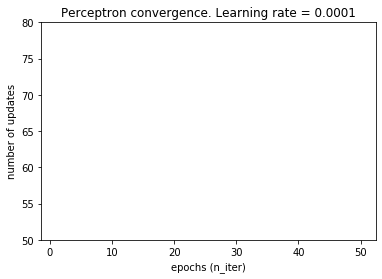

In [78]:
errors_ = fit(X,Y)
y_pred = predict(X)

# print accuracy
print('Misclassified examples: %d' % (Y != y_pred).sum())
error = (Y != y_pred).sum()/len(y_pred)
print('Prediction accuracy: %.3f'% (1-error))

# plot cost
plt.plot((range(1, len(errors_) + 1)), errors_, marker='o');
plt.xlabel('epochs (n_iter)');
plt.ylabel('number of updates'); # number of times y_actual != y_pred
plt.ylim(50.0,80.0);

plt.title('Perceptron convergence. Learning rate = ' + str(eta));